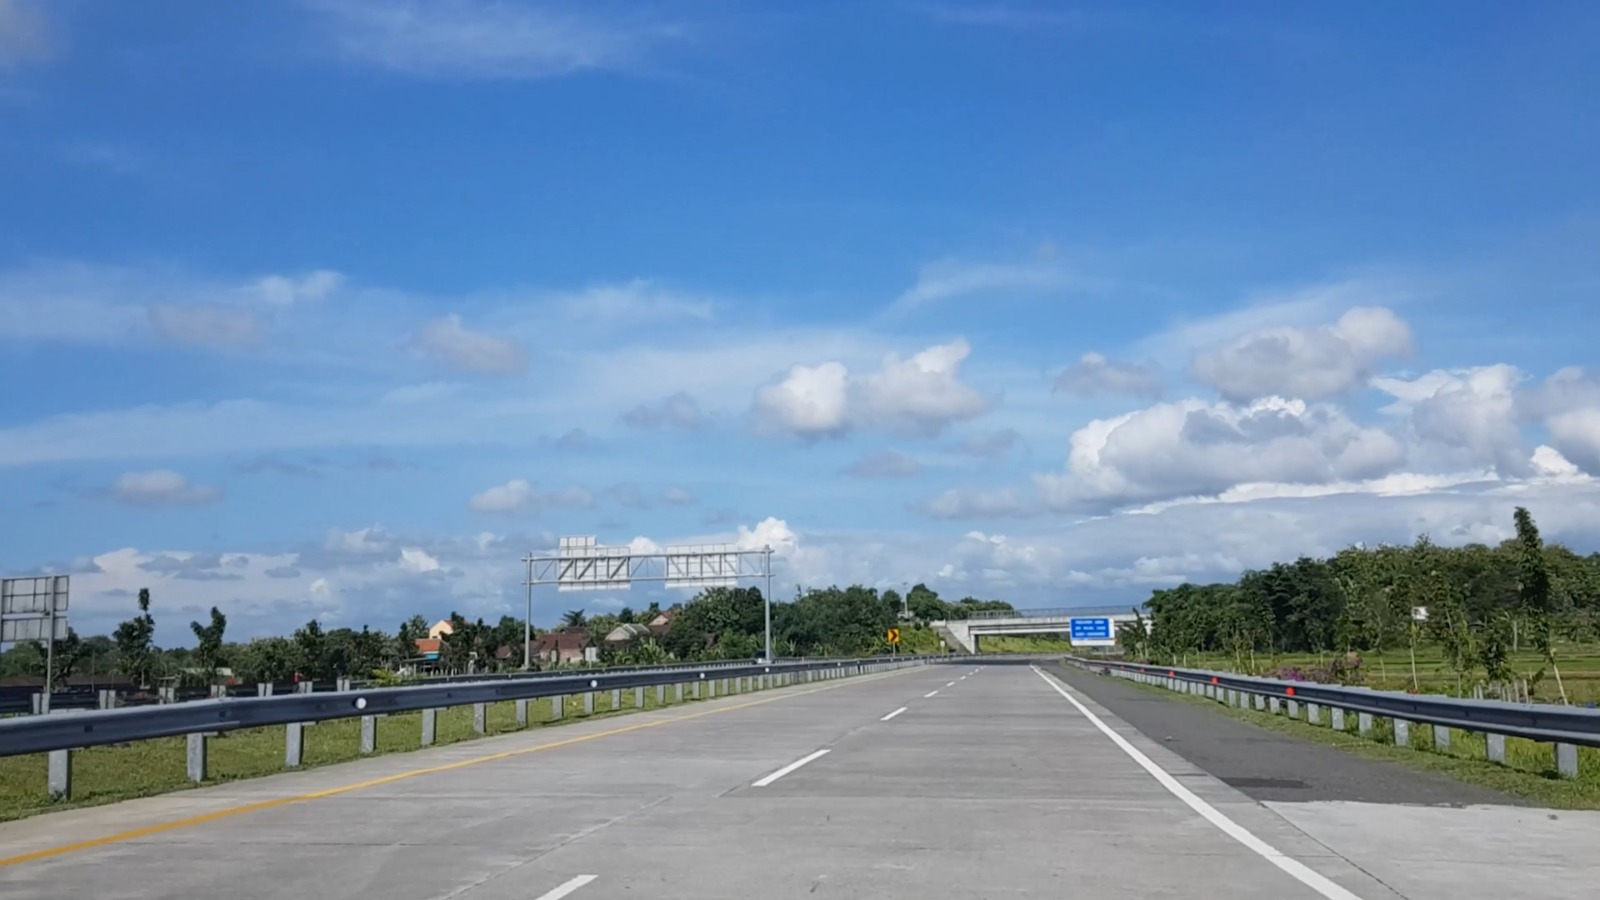

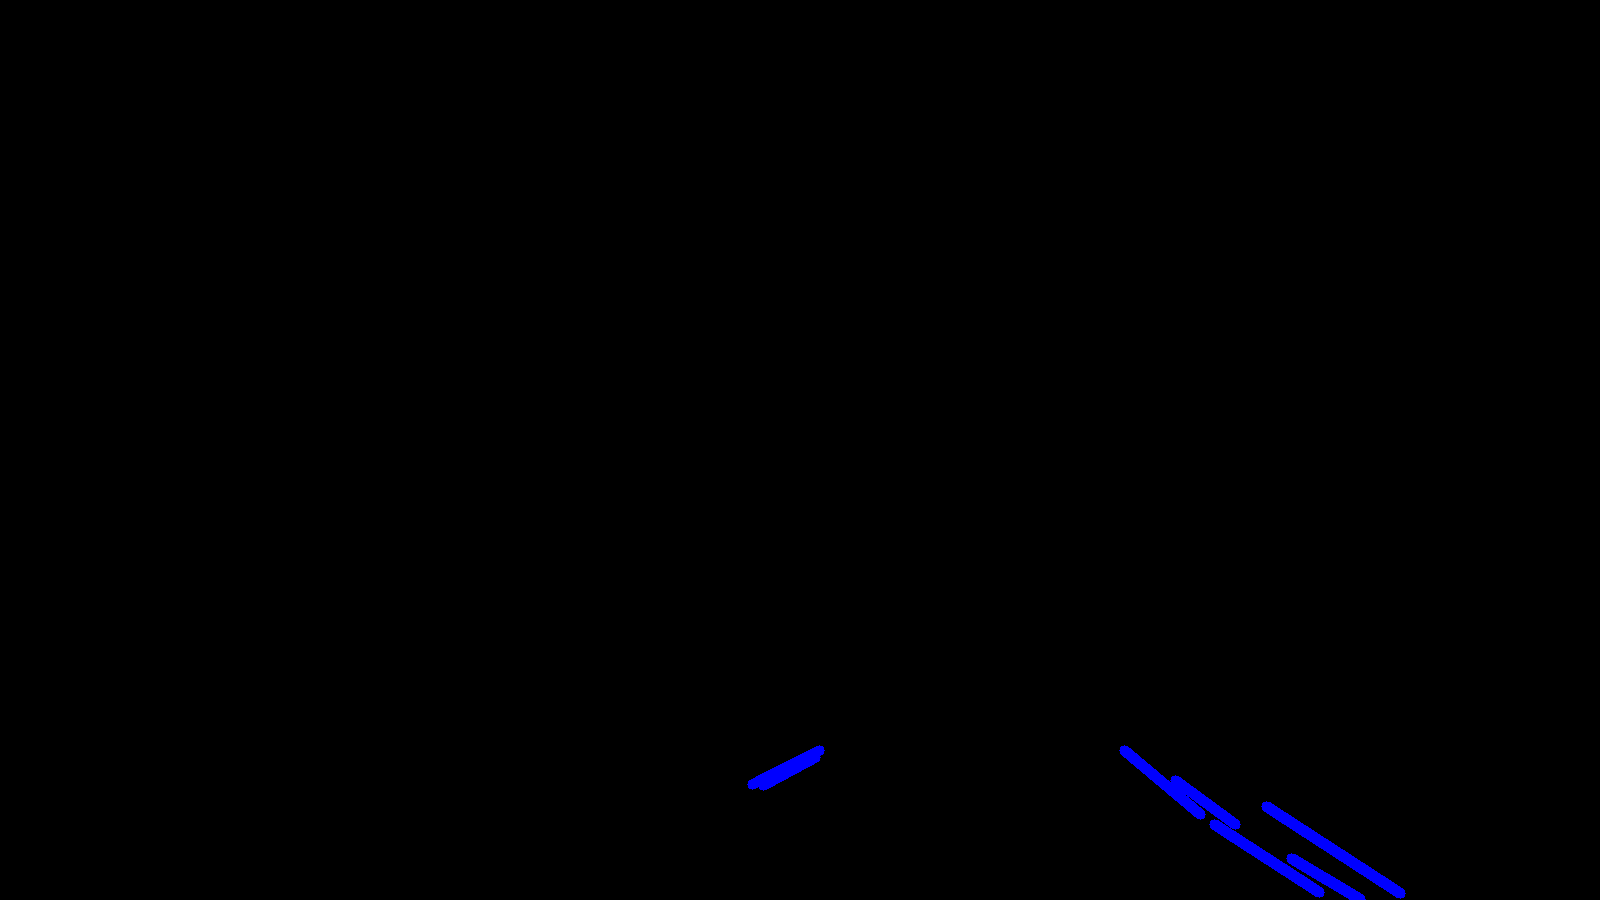

In [ ]:
import cv2
import numpy as np

def read_image(file_path):
    """
    Reads an image from the specified file path.

    Args:
        file_path (str): The path to the image file.

    Returns:
        np.ndarray: The image array.
    """
    return cv2.imread(file_path)

# Replace cv2.imshow() with a Google Colab-compatible alternative
from google.colab.patches import cv2_imshow

def display_image(image):
    """
    Displays the given image.

    Args:
        image (np.ndarray): The image to display.
    """
    cv2_imshow(image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

def preprocess_image(image):
    """
    Preprocesses the given image by converting it to grayscale,
    applying Gaussian blur, and performing Canny edge detection.

    Args:
        image (np.ndarray): The input image.

    Returns:
        np.ndarray: The preprocessed image.
    """
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blurred, 50, 150)
    return edges

def region_of_interest(image, vertices):
    """
    Applies a region of interest mask to the given image.

    Args:
        image (np.ndarray): The input image.
        vertices (list of tuples): Vertices defining the region of interest polygon.

    Returns:
        np.ndarray: The masked image.
    """
    mask = np.zeros_like(image)
    cv2.fillPoly(mask, vertices, 255)
    masked_image = cv2.bitwise_and(image, mask)
    return masked_image

def detect_lane_lines(image, rho, theta, threshold, min_line_len, max_line_gap):
    """
    Detects lane lines in the given image using Hough Transform.

    Args:
        image (np.ndarray): The input image.
        rho (float): Distance resolution in pixels of the Hough grid.
        theta (float): Angular resolution in radians of the Hough grid.
        threshold (int): Minimum number of votes (intersections in Hough grid cell).
        min_line_len (int): Minimum number of pixels making up a line.
        max_line_gap (int): Maximum gap in pixels between connectable line segments.

    Returns:
        np.ndarray: Image with detected lane lines.
    """
    lines = cv2.HoughLinesP(image, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    return lines

def draw_lines(image, lines, color=(255, 0, 0), thickness=10):
    """
    Draws lines on the given image.

    Args:
        image (np.ndarray): The input image.
        lines (list of tuples): List of line coordinates.
        color (tuple): Color of the lines in BGR format.
        thickness (int): Thickness of the lines.
    """
    line_image = np.zeros_like(image)
    if lines is not None:
        for line in lines:
            for x1, y1, x2, y2 in line:
                cv2.line(line_image, (x1, y1), (x2, y2), color, thickness)
    return line_image

def main():
    # Read the image
    image = read_image("testlaneimage.jpeg")

    # Display the original image
    display_image(image)

    # Preprocess the image
    edges = preprocess_image(image)

    # Define region of interest vertices
    height, width = edges.shape
    vertices = np.array([[(200, height), (1500, height), (1000, 700)]], dtype=np.int32)

    # Apply region of interest mask
    masked_edges = region_of_interest(edges, vertices)

    # Detect lane lines
    lane_lines = detect_lane_lines(masked_edges, rho=2, theta=np.pi/180, threshold=100, min_line_len=40, max_line_gap=5)

    # Draw lane lines on the original image
    lane_image = np.copy(image)
    line_image = draw_lines(lane_image, lane_lines)

    # Display the image with lane lines
    display_image(line_image)

if __name__ == "__main__":
    main()


In [ ]:
img1=cv2.imread("cv2test.jpg")
gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
edges = cv2.Canny(blurred, 50, 150)

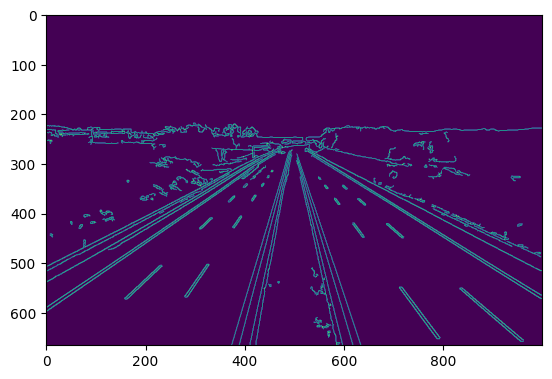

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(edges)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
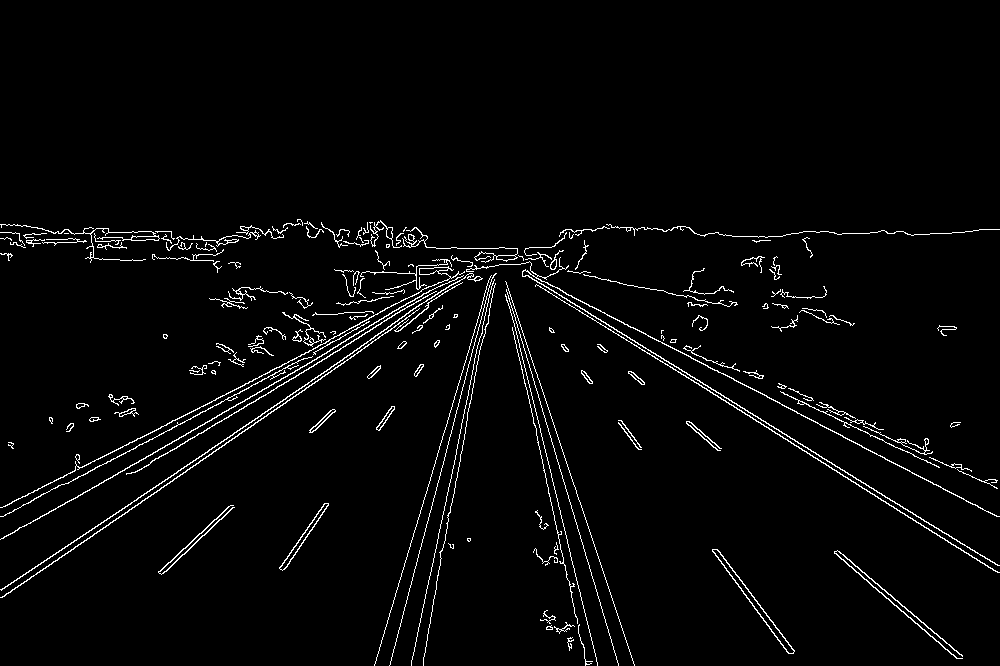

In [ ]:
edges

array([[139, 140, 141, ..., 102, 102, 102],
       [140, 140, 141, ..., 102, 102, 102],
       [141, 141, 142, ..., 103, 103, 103],
       ...,
       [ 26,  26,  27, ...,  21,  21,  21],
       [ 28,  29,  29, ...,  21,  21,  21],
       [ 29,  30,  31, ...,  21,  21,  21]], dtype=uint8)
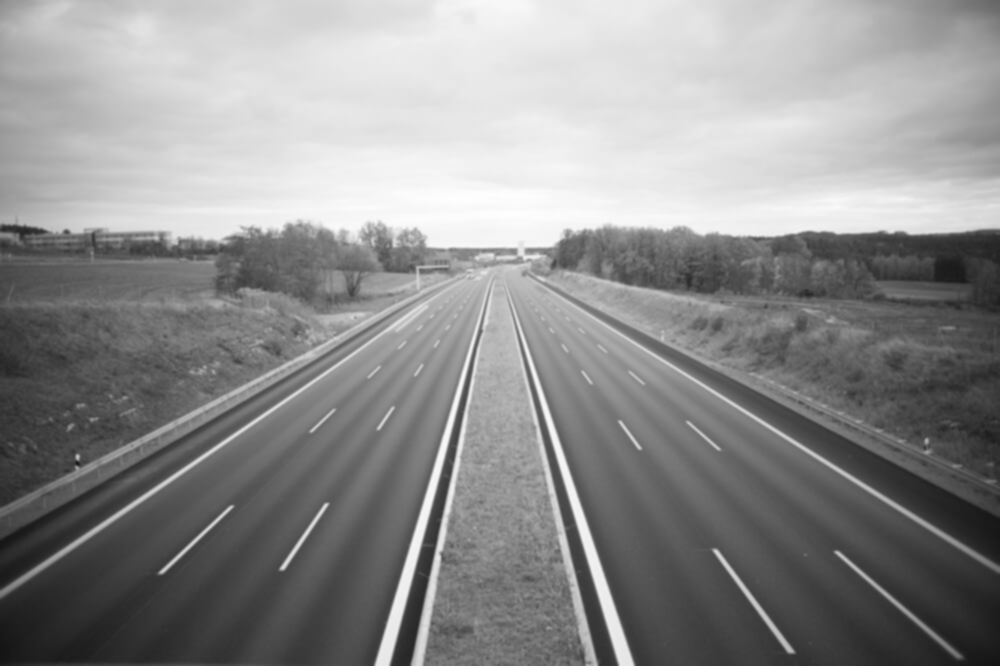

In [ ]:
blurred

array([[138, 139, 140, ..., 102, 102, 101],
       [139, 139, 141, ..., 102, 102, 102],
       [140, 141, 142, ..., 103, 103, 103],
       ...,
       [ 24,  25,  25, ...,  21,  21,  21],
       [ 28,  30,  32, ...,  21,  21,  21],
       [ 29,  31,  32, ...,  21,  21,  21]], dtype=uint8)
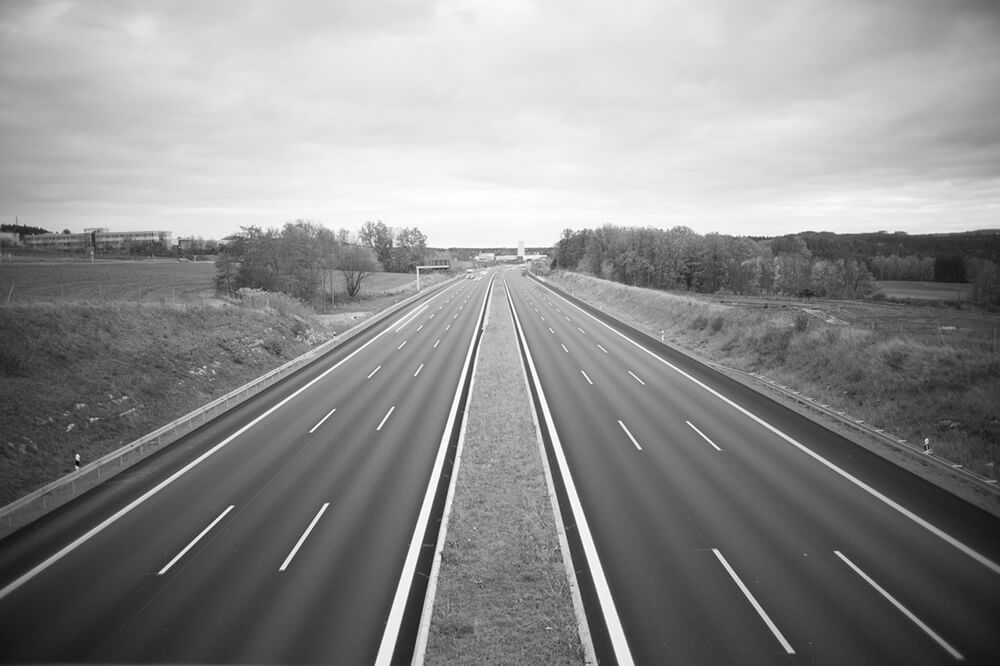

In [ ]:
gray

Exception ignored in: <coroutine object process_video at 0x7c7a781f87b0>
Traceback (most recent call last):
  File "<string>", line 1, in <lambda>
KeyError: '__import__'
Exception ignored in: <coroutine object process_video at 0x7c7a781f87b0>
Traceback (most recent call last):
  File "<string>", line 1, in <lambda>
KeyError: '__import__'
/usr/lib/python3.10/imp.py:343: RuntimeWarning: coroutine 'process_video' was never awaited
  return _load(spec)


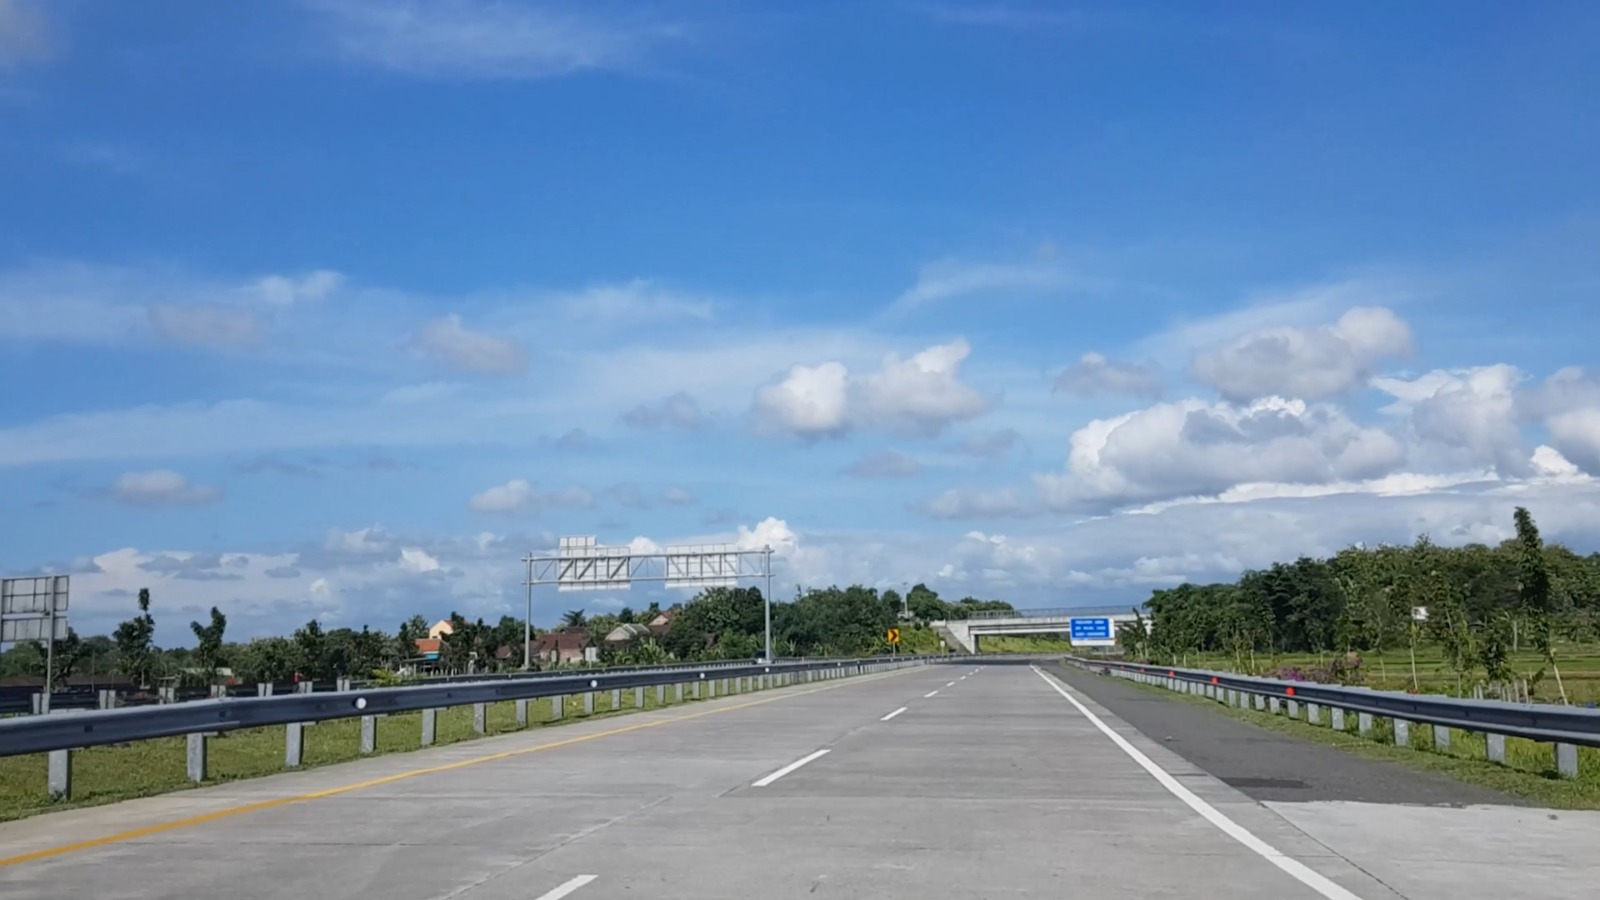

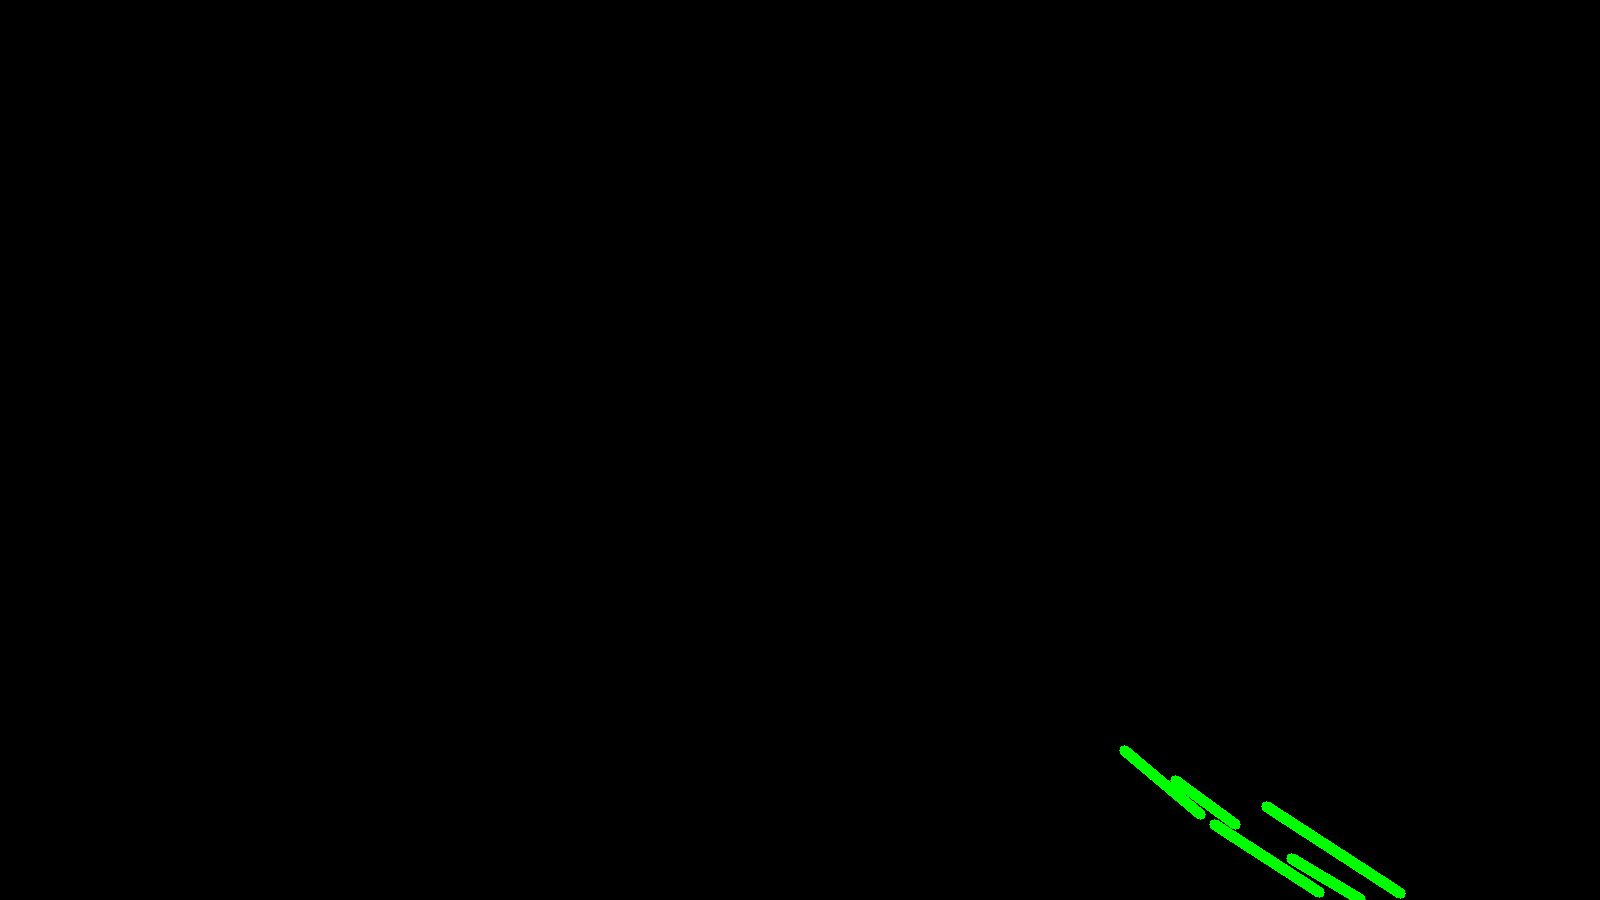

In [ ]:
import cv2
import numpy as np

def read_image(file_path):
    """
    Reads an image from the specified file path.

    Args:
        file_path (str): The path to the image file.

    Returns:
        np.ndarray: The image array.
    """
    return cv2.imread(file_path)

# Replace cv2.imshow() with cv2_imshow
from google.colab.patches import cv2_imshow

def display_image(image):
    """
    Displays the given image.

    Args:
        image (np.ndarray): The image to display.
    """
    cv2_imshow(image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

def preprocess_image(image):
    """
    Preprocesses the given image by converting it to grayscale,
    applying Gaussian blur, and performing Canny edge detection.

    Args:
        image (np.ndarray): The input image.

    Returns:
        np.ndarray: The preprocessed image.
    """
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blurred, 50, 150)
    return edges

def region_of_interest(image, vertices):
    """
    Applies a region of interest mask to the given image.

    Args:
        image (np.ndarray): The input image.
        vertices (list of tuples): Vertices defining the region of interest polygon.

    Returns:
        np.ndarray: The masked image.
    """
    mask = np.zeros_like(image)
    cv2.fillPoly(mask, vertices, 255)
    masked_image = cv2.bitwise_and(image, mask)
    return masked_image

def detect_lane_lines(image, rho, theta, threshold, min_line_len, max_line_gap):
    """
    Detects lane lines in the given image using Hough Transform.

    Args:
        image (np.ndarray): The input image.
        rho (float): Distance resolution in pixels of the Hough grid.
        theta (float): Angular resolution in radians of the Hough grid.
        threshold (int): Minimum number of votes (intersections in Hough grid cell).
        min_line_len (int): Minimum number of pixels making up a line.
        max_line_gap (int): Maximum gap in pixels between connectable line segments.

    Returns:
        np.ndarray: Image with detected lane lines.
    """
    lines = cv2.HoughLinesP(image, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    return lines

def draw_lines(image, lines, color=(255, 0, 0), thickness=10):
    """
    Draws lines on the given image.

    Args:
        image (np.ndarray): The input image.
        lines (list of tuples): List of line coordinates.
        color (tuple): Color of the lines in BGR format.
        thickness (int): Thickness of the lines.
    """
    line_image = np.zeros_like(image)
    if lines is not None:
        for line in lines:
            for x1, y1, x2, y2 in line:
                cv2.line(line_image, (x1, y1), (x2, y2), color, thickness)
    return line_image

def separate_left_right_lines(lines, width):
    """
    Separates detected lines into left and right lanes based on their slopes.

    Args:
        lines (np.ndarray): Array of detected lines.
        width (int): Width of the image.

    Returns:
        list: Two lists of lines representing left and right lanes respectively.
    """
    left_lines = []
    right_lines = []
    for line in lines:
        for x1, y1, x2, y2 in line:
            slope = (y2 - y1) / (x2 - x1)
            if slope < 0 and x1 < width / 2 and x2 < width / 2:
                left_lines.append([[x1, y1, x2, y2]])
            elif slope > 0 and x1 > width / 2 and x2 > width / 2:
                right_lines.append([[x1, y1, x2, y2]])
    return left_lines, right_lines

def main():
    # Read the image
    image = read_image("testlaneimage.jpeg")

    # Display the original image
    display_image(image)

    # Preprocess the image
    edges = preprocess_image(image)

    # Define region of interest vertices
    height, width = edges.shape
    vertices = np.array([[(200, height), (1500, height), (1000, 700)]], dtype=np.int32)

    # Apply region of interest mask
    masked_edges = region_of_interest(edges, vertices)

    # Detect lane lines
    lane_lines = detect_lane_lines(masked_edges, rho=2, theta=np.pi/180, threshold=100, min_line_len=40, max_line_gap=5)

    # Separate left and right lines
    left_lines, right_lines = separate_left_right_lines(lane_lines, width)

    # Draw left and right lane lines
    left_line_image = draw_lines(image, left_lines, color=(0, 0, 255))  # Red color for left lane
    right_line_image = draw_lines(image, right_lines, color=(0, 255, 0))  # Green color for right lane

    # Combine both lane line images
    combined_image = cv2.addWeighted(left_line_image, 1, right_line_image, 1, 0)

    # Display the image with left and right lane lines
    display_image(combined_image)

if __name__ == "__main__":
    main()
